# Image Classification Project using Keras
## Sign Classifier

### Importing Required Libraries

In [15]:
import numpy as np
import h5py
from keras import layers
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
%matplotlib notebook

### Loading Dataset

In [2]:
def load_dataset():
    train_dataset = h5py.File(r'C:\Users\user\Desktop\Data Science\train_signs.h5', 'r')
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File(r'C:\Users\user\Desktop\Data Science\test_signs.h5', 'r')
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
X_train_orig, y_train_orig, X_test_orig, y_test_orig, classes = load_dataset()

### Converting Classes to One Hot Matrix

In [3]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y
y_train = convert_to_one_hot(y_train_orig, 6).T
y_test = convert_to_one_hot(y_test_orig, 6).T

### Determing Shapes of Train and Test Datasets

In [4]:
print("X_train_orig Shape : ", X_train_orig.shape)
print("y_train Shape : ", y_train.shape)
print("X_test_orig Shape : ", X_test_orig.shape)
print("y_test Shape : ", y_test.shape)

X_train_orig Shape :  (1080, 64, 64, 3)
y_train Shape :  (1080, 6)
X_test_orig Shape :  (120, 64, 64, 3)
y_test Shape :  (120, 6)


### Displaying an Image from the Train Dataset

y =  [0. 0. 0. 1. 0. 0.]


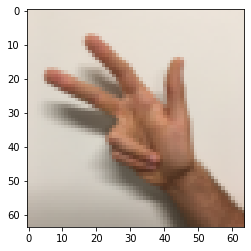

In [5]:
plt.figure()
index = 25
plt.imshow(X_train_orig[index])
print("y = ", np.squeeze(y_train[index,:]))

### Setting Random Seed

In [6]:
np.random.seed(1)

### Normalizing Dataset

In [7]:
X_train = X_train_orig / 255
X_test = X_test_orig / 255

### Building Keras Model

In [8]:
def signs_model(input_shape = (64, 64, 3), classes = 6):
    X_input = layers.Input(input_shape)
    X = layers.ZeroPadding2D((3, 3))(X_input)
    X = layers.Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1')(X)
    X = layers.BatchNormalization(axis = 3, name = 'bn0')(X)
    X = layers.Activation('relu')(X)
    X = layers.AveragePooling2D((2, 2), padding = 'same', name='max_pool')(X)
    X = layers.Flatten()(X)
    X = layers.Dense(classes, activation='softmax', name='fc')(X)
    model = Model(inputs = X_input, outputs = X, name='SignsModel')
    return model

### Creating Model

In [9]:
sm = signs_model(X_train.shape[1:])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



### Model Compiling

In [10]:
sm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [11]:
sm.fit(X_train, y_train, epochs = 40, batch_size = 64)


Epoch 1/40
1080/1080 [==============================] - 7s 6ms/step - loss: 2.5017 - accuracy: 0.3333
Epoch 2/40
1080/1080 [==============================] - 4s 3ms/step - loss: 0.7840 - accuracy: 0.7093
Epoch 3/40
1080/1080 [==============================] - 4s 3ms/step - loss: 0.4788 - accuracy: 0.8426
Epoch 4/40
1080/1080 [==============================] - 4s 3ms/step - loss: 0.3116 - accuracy: 0.9194
Epoch 5/40
1080/1080 [==============================] - 4s 3ms/step - loss: 0.2177 - accuracy: 0.9519
Epoch 6/40
1080/1080 [==============================] - 4s 3ms/step - loss: 0.1823 - accuracy: 0.9546
Epoch 7/40
1080/1080 [==============================] - 4s 3ms/step - loss: 0.1438 - accuracy: 0.9667
Epoch 8/40
1080/1080 [==============================] - 4s 3ms/step - loss: 0.1137 - accuracy: 0.9843
Epoch 9/40
1080/1080 [==============================] - 4s 3ms/step - loss: 0.0901 - accuracy: 0.9889
Epoch 10/40
1080/1080 [==============================] - 4s 3ms/step - loss: 0.06

### Model Accuracy

In [12]:
prediction = sm.evaluate(X_test, y_test)
print("Test Accuracy = ", prediction[1])

120/120 [==============================] - 0s 3ms/step
Test Accuracy =  0.949999988079071


### Model Summary

In [13]:
sm.summary()

Model: "SignsModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 32, 32, 64)        9472      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pool (AveragePooling2D)  (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0

### Prediction on Input Image

<IPython.core.display.Javascript object>


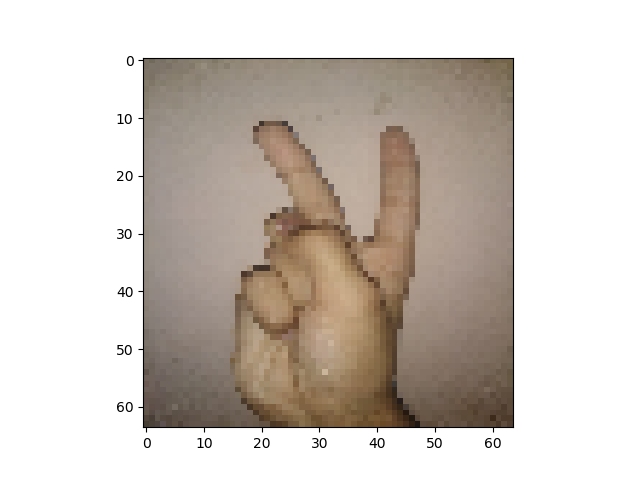

[[0. 0. 1. 0. 0. 0.]]


In [17]:
img_path = r'C:\Users\user\Desktop\Data Science\IMG_20200521_165456.jpg'
img = image.load_img(img_path, target_size=(64, 64))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(sm.predict(x))